# Comparision of 2 versions of Ameriflux data

First set up environment and load 2009-2014 gapfilled Ameriflux data

In [12]:
import sys
sys.path.append( '/home/greg/current/NMEG_utils/py_modules/' )

%matplotlib inline
import load_nmeg as ld
import transform_nmeg as tr
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

new_path = '/home/greg/sftp/eddyflux/Ameriflux_files/provisional/'

old_path = '/home/greg/sftp/eddyflux/Ameriflux_files/'

start = 2009
end = 2010

import imp
imp.reload(ld)

site = 'US-Mpg'

new = ld.get_multiyr_aflx( site, new_path, gapfilled=True, startyear=start, endyear=end)
old = ld.get_multiyr_aflx( site, old_path, gapfilled=True, startyear=start, endyear=end, old_dparse=True)

Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Mpg_2009_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Mpg_2010_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/US-Mpg_2009_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/US-Mpg_2010_gapfilled.txt


## Calculate ET and create daily data for each site

In [19]:
new_d = tr.resample_30min_aflx( new )
old_d = tr.resample_30min_aflx( old )

Index(['GPP_g_int', 'RECO_g_int', 'FC_F_g_int', 'ET_mm_24hint_0', 'P_F_sum',
       'TA_F_avg', 'RH_F_avg', 'SW_IN_F_avg', 'RNET_F_avg', 'TA_F_min',
       'VPD_F_min', 'TA_F_max', 'VPD_F_max'],
      dtype='object')

## Plot timeseries

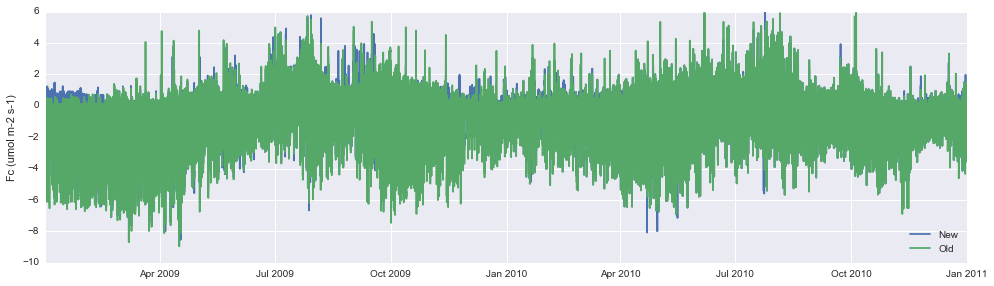

In [15]:
fig0 = plt.figure( figsize=( 16.5, 4.5 ), dpi=100, facecolor='w', edgecolor='k' )
ax1 = fig0.add_subplot( 111 )
h1 = ax1.plot( new.index, new.FC_F ) 
h2 = ax1.plot( old.index, old.FC_F )
plt.ylabel('Fc (umol m-2 s-1)')
plt.legend( ['New', 'Old'], loc='lower right' )

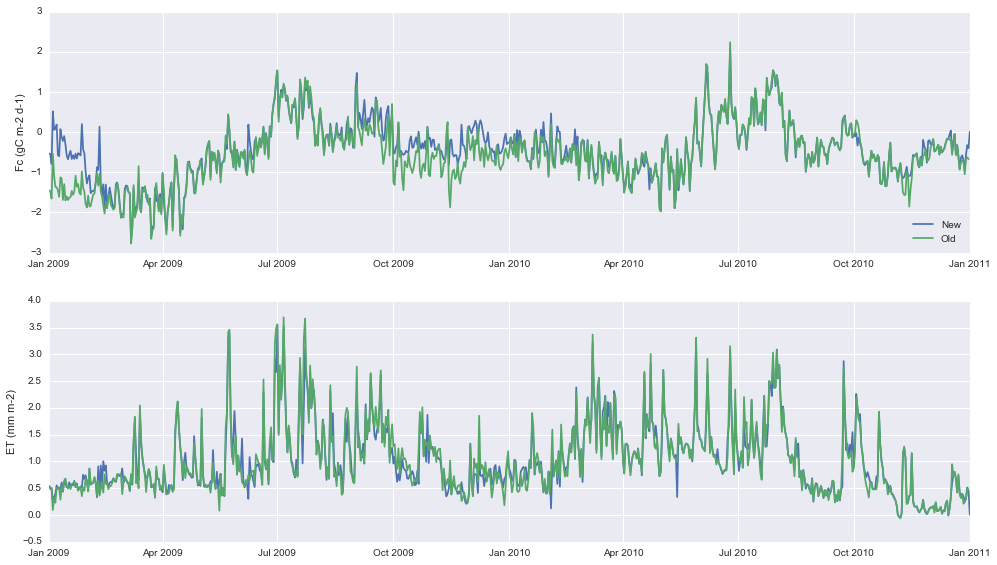

In [20]:
fig1 = plt.figure( figsize=( 16.5, 9.5 ), dpi=100, facecolor='w', edgecolor='k' )
ax1 = fig1.add_subplot(211)
h1 = ax1.plot( new_d.index, new_d.FC_F_g_int ) 
h2 = ax1.plot( old_d.index, old_d.FC_F_g_int )
plt.ylabel('Fc (gC m-2 d-1)')
plt.legend( ['New', 'Old'], loc='lower right' )
ax2 = fig1.add_subplot(212)
h1 = ax2.plot( new_d.index, new_d.ET_mm_24hint_0 ) 
h2 = ax2.plot( old_d.index, old_d.ET_mm_24hint_0 )
plt.ylabel('ET (mm m-2)')
plt.show()
#plt.legend( ['Control', 'Girdle'], loc='lower right' )